<a href="https://colab.research.google.com/github/NoelleI/AI-Experiments-Pigmentation/blob/master/redness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/NoelleI/Pigmentation.git

Cloning into 'Pigmentation'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 725 (delta 44), reused 71 (delta 5), pack-reused 580
Receiving objects: 100% (725/725), 91.22 MiB | 28.89 MiB/s, done.
Resolving deltas: 100% (249/249), done.


In [0]:
import numpy as np
from scipy import ndimage, misc
import re
import os
from datetime import datetime
import matplotlib.pyplot as plt
import skimage


pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 1"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [46]:
filenames

['1_F_43_XX_25_20190228_214705_FA101129_0100_SPOTS_57_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR57.jpg',
 '1_F_43_XX_25_20190226_224523_FA101129_0100_SPOTS_24_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR24.jpg',
 '1_F_43_XX_25_20190223_170715_FA101129_0100_SPOTS_XX_SPOTS#01_S_UnitedStates_CND_XX.jpg',
 '1_F_43_XX_25_20190225_100933_FA101129_0100_SPOTS_71_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR71.jpg',
 '1_F_43_XX_25_20190306_230513_FA101129_0100_SPOTS_64_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR64.jpg',
 '1_F_43_XX_25_20190310_203414_FA101129_0100_SPOTS_60_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR60.jpg',
 '1_F_43_XX_25_20190227_212058_FA101129_0100_SPOTS_51_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR51.jpg',
 '1_F_43_XX_25_20190301_083613_FA101129_0100_SPOTS_81_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR81.jpg',
 '1_F_43_XX_25_20190228_083804_FA101129_0100_SPOTS_74_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR74.jpg',
 '1_F_43_XX_25_20190310_104002_FA101129_0100_SPOTS_86_SPOTS#01_S_UnitedStates_CND_TRXXURXX_FR

In [47]:
len(pigs)

18

In [48]:
pigs.shape

(18, 480, 640, 3)

In [0]:
import pandas as pd
from scipy import stats
#del str
def measure_score(pigs): 
  
    score = []

    i = 0
    

    for pig in pigs:
       
        g = pig[:,:,1].reshape(-1)  #- 3*imagen[:,:,1].reshape(-1)/8
        b = pig[:,:,1].reshape(-1)
       
        
      


       
        
        
      

        
        
        

        if i > 0:

          mg = np.min(g)               ###may need to scroll over earlier days ###
          ag = np.mean(g)
          #sg = stats.skew(g)

          mg_last = np.min(g_last)
          ag_last = np.mean(g_last)
          #sg = stats.skew(g_last)
 
          mb = np.min(b)
          ab = np.mean(b)
          
          mb_last = np.min(b_last)
          ab_last = np.mean(b_last)

          delba = np.abs(ab-ab_last)
          delbm = np.abs(mb - mb_last)

          delga = np.abs(ag -ag_last)
          delgm = np.abs(mg - mg_last)

          print("i\n", i)
          print("here2", 1*10**3.1/1*10**3.1, "\n")
          print(delba/delga, "\n\n", delba, delga,  )

          if delba/delga >= 1*10**3.1/1*10**3.1:
            print("here", 1*10**3.1/1*10**3.1)
            sca = 0
          else:
            sca = delga

          if delbm/delgm >= 1*10**3.1/1*10**3.1:
            print("here", 1*10**3.1/1*10**3.1)
            scm = 0
          else:
            scm = delgm

          sc = sca + scm

          




            
          

        else:
          sc = 0
          g_last = g
          b_last = b
          print("here")

        
       
        score += [sc]
        
        i += 1
       
      
        
    
    green_score = np.array(score)
    
    return(green_score)
        

In [70]:
green_score = measure_score(pigs)

here
i
 1
here2 1584893.1924611144 

1.0 

 8.82895182291665 8.82895182291665
i
 2
here2 1584893.1924611144 

1.0 

 13.16781901041665 13.16781901041665
i
 3
here2 1584893.1924611144 

1.0 

 11.316188151041672 11.316188151041672
i
 4
here2 1584893.1924611144 

1.0 

 9.289404296874977 9.289404296874977
i
 5
here2 1584893.1924611144 

1.0 

 5.009108072916689 5.009108072916689
i
 6
here2 1584893.1924611144 

1.0 

 17.548277994791647 17.548277994791647
i
 7
here2 1584893.1924611144 

1.0 

 7.050065104166663 7.050065104166663
i
 8
here2 1584893.1924611144 

1.0 

 24.841513671874992 24.841513671874992
i
 9
here2 1584893.1924611144 

1.0 

 6.790449218749984 6.790449218749984
i
 10
here2 1584893.1924611144 

1.0 

 5.744365234374982 5.744365234374982
i
 11
here2 1584893.1924611144 

1.0 

 10.071748046875001 10.071748046875001
i
 12
here2 1584893.1924611144 

1.0 

 8.40400716145831 8.40400716145831
i
 13
here2 1584893.1924611144 

1.0 

 16.241673177083328 16.241673177083328
i
 14
here

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in ubyte_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in ubyte_scalars


Text(0.5, 1.0, 'Experiment 2, Spot 1')

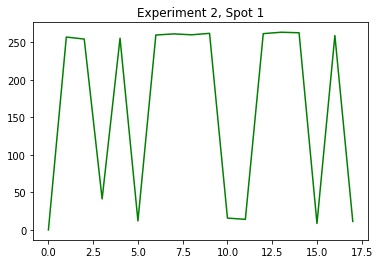

In [54]:

plt.plot(green_score, 'g-')


plt.title('Experiment 2, Spot 1')



In [0]:
#del str
pigs = []
filenames_dict_pigs = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 1/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:   ####remember to update in order to avoid masks###
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            #n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            #key = n.group(3)

            #key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            #filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
            n = re.match("(\d*)", filename)
            #print(n.group(), " ")
            #print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
            filenames_dict_pigs.update({int(n.group()): [os.path.join(root, filename), filename]})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict_pigs.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict_pigs[key][0])
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [27]:
del str
green_score = 255*measure_score(pigs)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in float_scalars


Text(0.5, 1.0, 'Experiment 1, Spot 4')

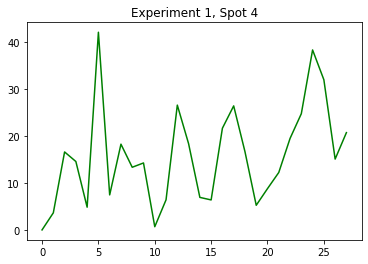

In [28]:

plt.plot(green_score, 'g-')

plt.title('Experiment 1, Spot 4')

In [0]:
pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 4"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [0]:
del str
green_score = measure_score(pigs)

Text(0.5, 1.0, 'Experiment 2, Spot 4')

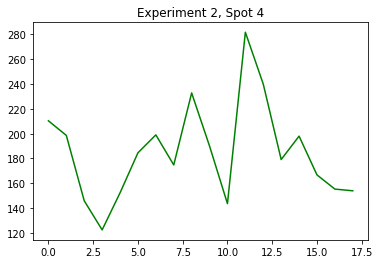

In [16]:

plt.plot(green_score, 'g-')

plt.title('Experiment 2, Spot 4')

In [0]:
pigs = []
filenames_dict = {}
str = "./Pigmentation/Pigmentation_photos/Experiment 2/Spot 2"    #photo directory on cloned repository for experimental pigmentation data


for root, dirnames, filenames in os.walk(str): 
    #print(filenames)
    for filename in filenames:
           # print(filename, "\n")
      #if re.search('d*[^{r|f}].jpg', filename):
            n =  re.match("(.*)(2019)(\d*_\d*)_(.*)", filename)
            if n:
              key = n.group(3)

              key = datetime.strptime(key, '%m%d_%H%M%S')
           # print(key, " ")
           # print(filename, "\n")
            #print(os.path.join(root, filename), "\n")
              filenames_dict.update({key: os.path.join(root, filename)})
            #print(filenames_dict, "\n\n")
#print(filenames_dict.keys(),"\n")
for key in sorted(filenames_dict.keys()):
  #print(key,filenames_dict[key], "\n")
  image = plt.imread(filenames_dict[key])
  #image = skimage.transform.resize(image, (192,256,3))  
  
  pigs+= [image]
  
  
pigs = np.asarray(pigs)

In [0]:
red, green, blue = measure_min_colours(pigs)

Text(0.5, 1.0, 'Experiment 2, Spot 2')

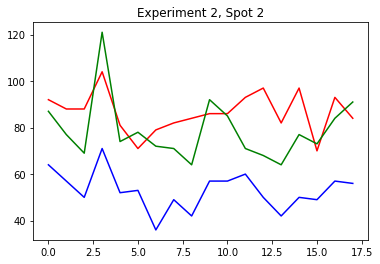

In [0]:
plt.plot(red, 'r-')
plt.plot(green, 'g-')
plt.plot(blue, 'b-')
plt.title('Experiment 2, Spot 2')

In [0]:
red

array([ 92,  88,  88, 104,  81,  71,  79,  82,  84,  86,  86,  93,  97,
        82,  97,  70,  93,  84], dtype=uint8)